# Phase-plane plotter 

This code demonstrates the standard phase plane pictures that you might have examined in previous differential equations courses. We study: 

$$
\begin{align*}
\dot{x} &= y - g(x) \\
\dot{y} &= h(x) - x
\end{align*}
$$

where $h(x) = 4(2 - x)$ and $g(x) = \sin(x)$

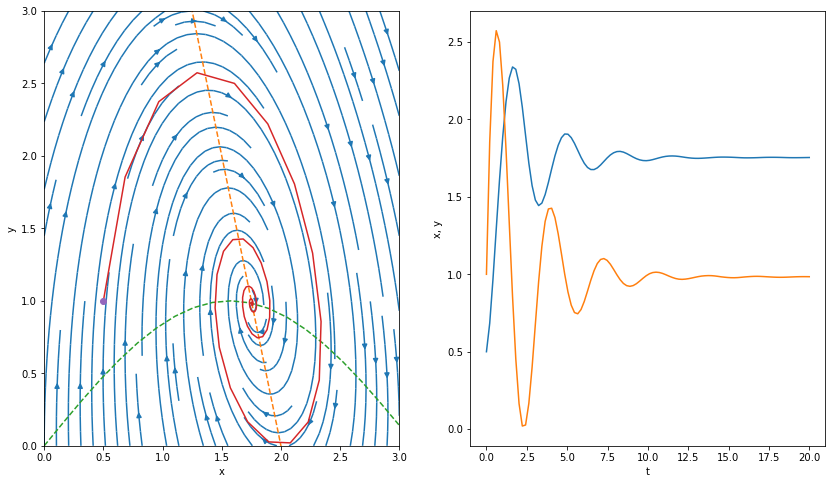

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

h = lambda x: 4*(2-x)
g = lambda x: np.sin(x)
# Define the ODE 
def f(t,Y):
    x, y = Y
    return [y - g(x), h(x)-y]

xmin = 0.0; xmax = 3.0;
ymin = 0.0; ymax = 3.0;
x = np.linspace(xmin, xmax, 20)
y = np.linspace(xmin, xmax, 20)

# Create a grid to do phase plane arrows
X, Y = np.meshgrid(x, y)
u, v = np.zeros(X.shape), np.zeros(Y.shape)

t = 0
NI, NJ = X.shape
for i in range(NI):
    for j in range(NJ):
        xx = X[i, j]
        yy = Y[i, j]
        fp = f(t,[xx, yy])
        u[i,j] = fp[0]
        v[i,j] = fp[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
ax1.streamplot(X,Y,u,v)
ax1.plot(x, h(x), '--')
ax1.plot(x, g(x), '--')


ax1.set(xlabel='x', ylabel='y', xlim=[xmin,xmax], ylim=[ymin,ymax])

# # Plot an example solution
# x0 = -1.5; y0 = S(x0);
x0 = 0.5; y0 = 1.0;
tstart = 0; tend = 20;
t = np.linspace(tstart, tend, 100)
sol = solve_ivp(f, [tstart, tend], [x0,y0], t_eval=t)

ax1.plot(sol.y[0,:],sol.y[1,:])
ax1.plot(x0, y0, 'o')

ax2.plot(sol.t, sol.y[0,:])
ax2.plot(sol.t, sol.y[1,:])
ax2.set(xlabel='t', ylabel='x, y');


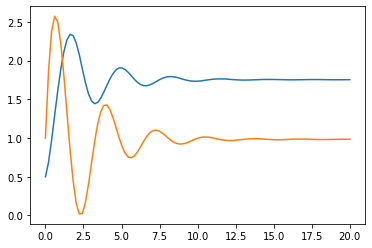

In [10]:
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])